In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import sys
import os
import pickle

sys.path.append(os.path.abspath("../src/"))
import utils as utils
import models as models

import matplotlib.pyplot as plt

DATA = '../src/data'

In [2]:
def load_and_plot_graph(file_path):
    # Load the graph
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
    
    # Ensure the loaded object is a NetworkX graph
    if not isinstance(G, nx.Graph):
        raise TypeError("The loaded object is not a NetworkX graph.")
    
    # Plot the graph using a spring layout
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=12)
    plt.title('Graph')
    plt.show()
    return G

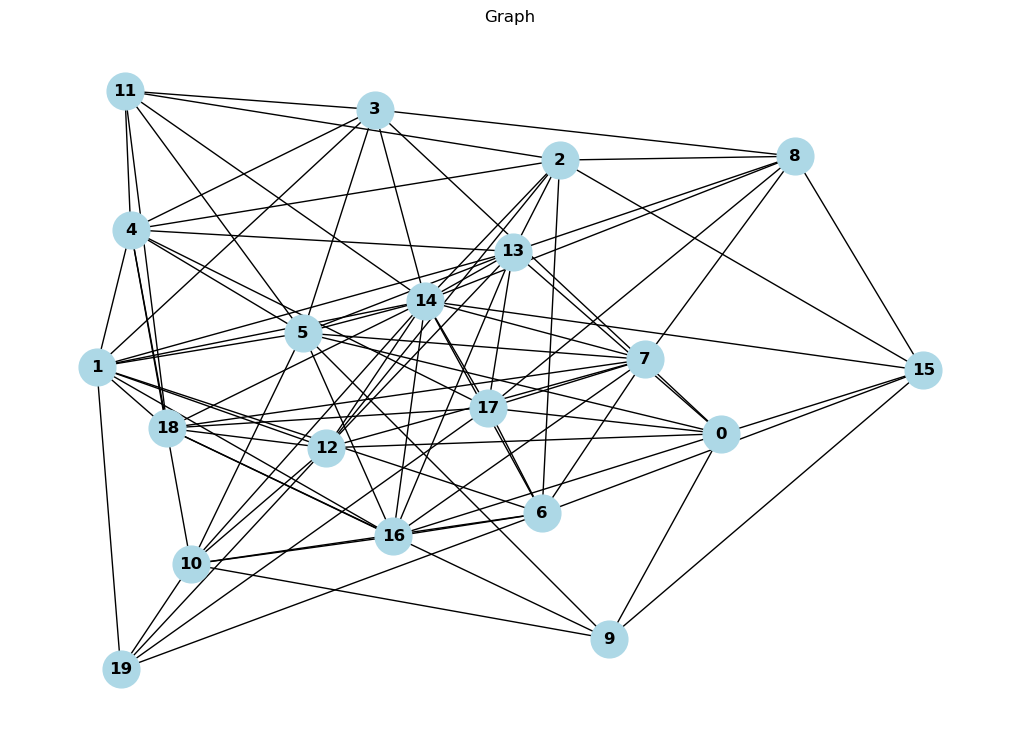

In [3]:
graph_file_path = DATA+'/outputs/erdos_renyi/'
graphs_list = os.listdir(graph_file_path)
G = load_and_plot_graph(graph_file_path+graphs_list[0])


In [4]:
import networkx as nx

adjacency_matrix = nx.adjacency_matrix(G)
adjacency_matrix = np.array(adjacency_matrix.todense())
print("Adjacency Matrix:")
print(adjacency_matrix)


Adjacency Matrix:
[[0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1]
 [0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0]
 [0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0]
 [1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0]
 [0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
 [0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0]
 [0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
 [1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
 [1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1]
 [0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0]
 [0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0]]


In [5]:
import numpy as np

degree_dict = dict(G.degree())
n = len(degree_dict)
degree_matrix = np.zeros((n, n), dtype=int)
np.fill_diagonal(degree_matrix, list(degree_dict.values()))
print(degree_matrix)


[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0

In [6]:
degree_matrix_inv = np.linalg.inv(degree_matrix + np.eye(degree_matrix.shape[0])) - np.eye(degree_matrix.shape[0])
embedding_input = np.matmul(degree_matrix_inv, adjacency_matrix)
embedding_input 

array([[ 0.        ,  0.        ,  0.        , -0.88888889,  0.        ,
        -0.88888889,  0.        ,  0.        ,  0.        , -0.88888889,
         0.        ,  0.        , -0.88888889, -0.88888889,  0.        ,
        -0.88888889, -0.88888889, -0.88888889,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.90909091, -0.90909091,
        -0.90909091, -0.90909091,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.90909091, -0.90909091, -0.90909091,
         0.        , -0.90909091,  0.        , -0.90909091, -0.90909091],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.88888889,
         0.        , -0.88888889,  0.        , -0.88888889,  0.        ,
         0.        , -0.88888889, -0.88888889, -0.88888889, -0.88888889,
        -0.88888889,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.875     , -0.875     ,  0.        ,  0.        , -0.875     ,
        -0.875     ,  0.        ,  0.        , -

In [7]:
print(len(hidden_activations))
print(hidden_activations[0].shape)
print(D.shape)

NameError: name 'hidden_activations' is not defined

In [ ]:
from models import SAE
model_emb = SAE.GraphModel

In [ ]:
n = degree_matrix.shape[0]  # Number of nodes in your graph
hidden_size_1 = 5  # Size of the first hidden layer
hidden_size_2 = 2  # Size of the second hidden layer

#S = torch.rand(n, n)  # Example similarity matrix
#D = torch.diag(torch.sum(S, dim=1))  # Degree matrix
D = torch.from_numpy(degree_matrix).float()
S = torch.from_numpy(adjacency_matrix).float()

layers_sizes = [n, hidden_size_1, hidden_size_2]  # Define the sizes of your layers
rho = 0.05  # Sparsity parameter
beta = 1  # Weight for sparsity penalty
learning_rate = 0.01
num_epochs = 1000

# Ensure that D is invertible
D = D + torch.eye(n) * 1e-10

model = model_emb(S, D, layers_sizes, rho, beta, learning_rate, num_epochs)
hidden_activations = model()


In [ ]:
print(len(hidden_activations))
print(hidden_activations[0].shape)
print(D.shape)

2
torch.Size([20, 5])
torch.Size([20, 20])


# Testing for multiple graphs

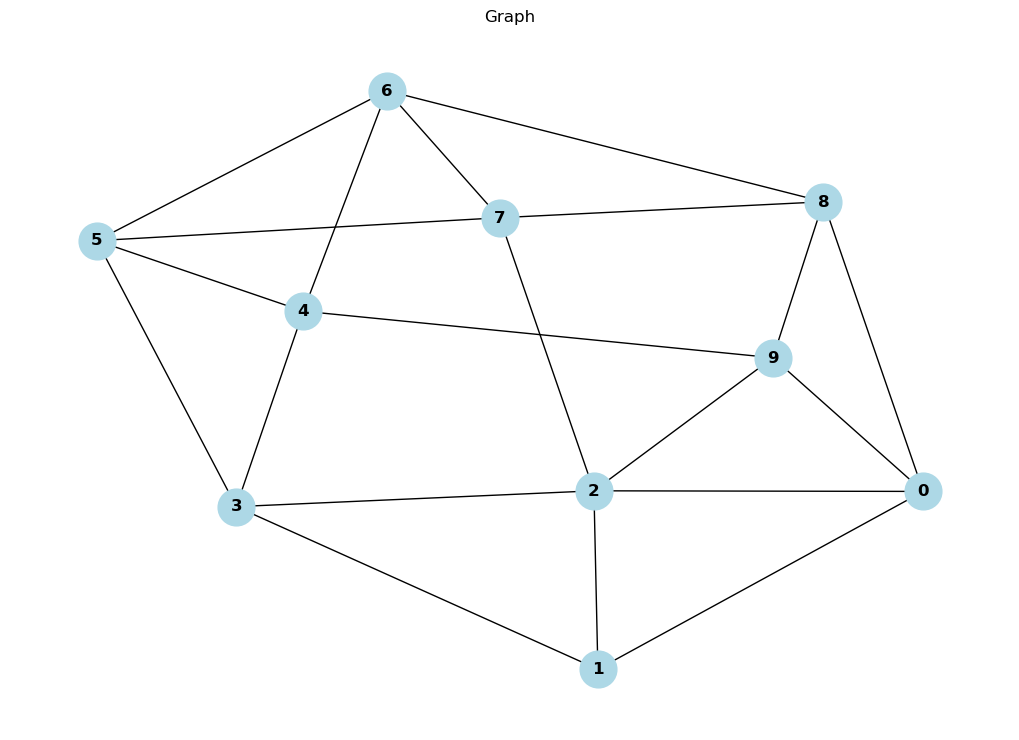

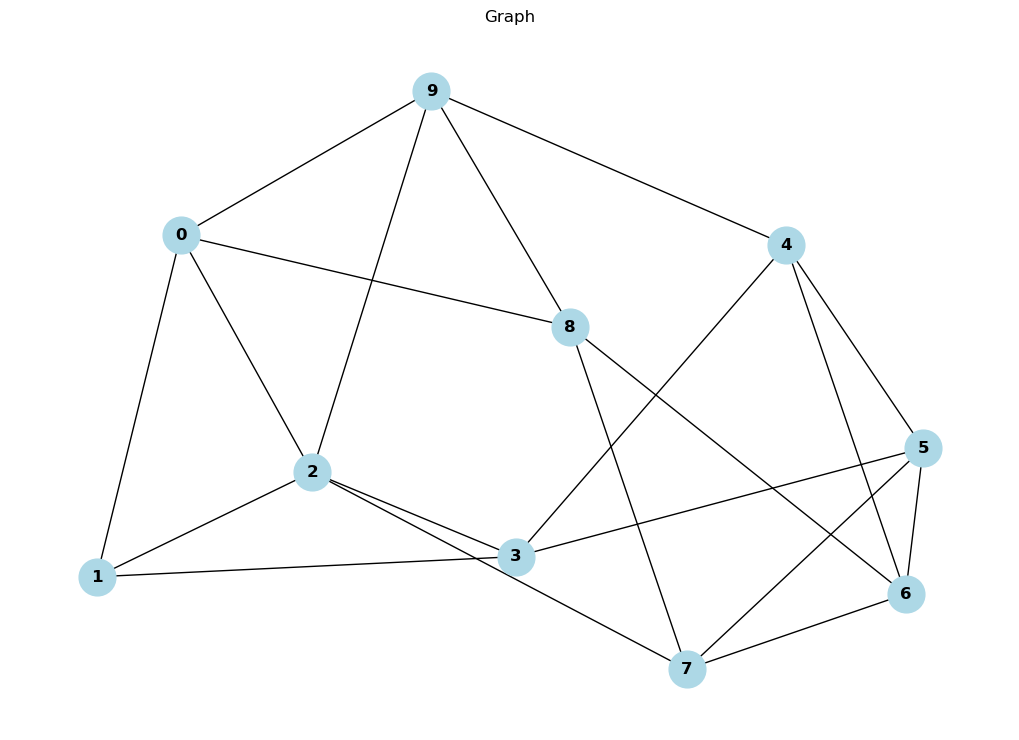

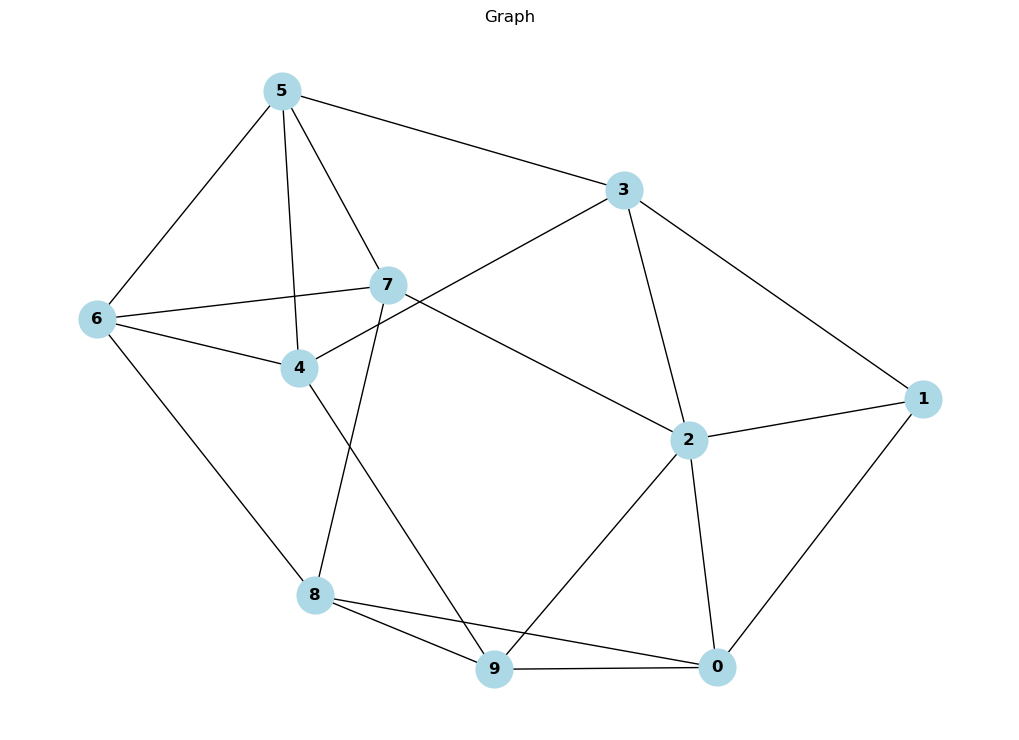

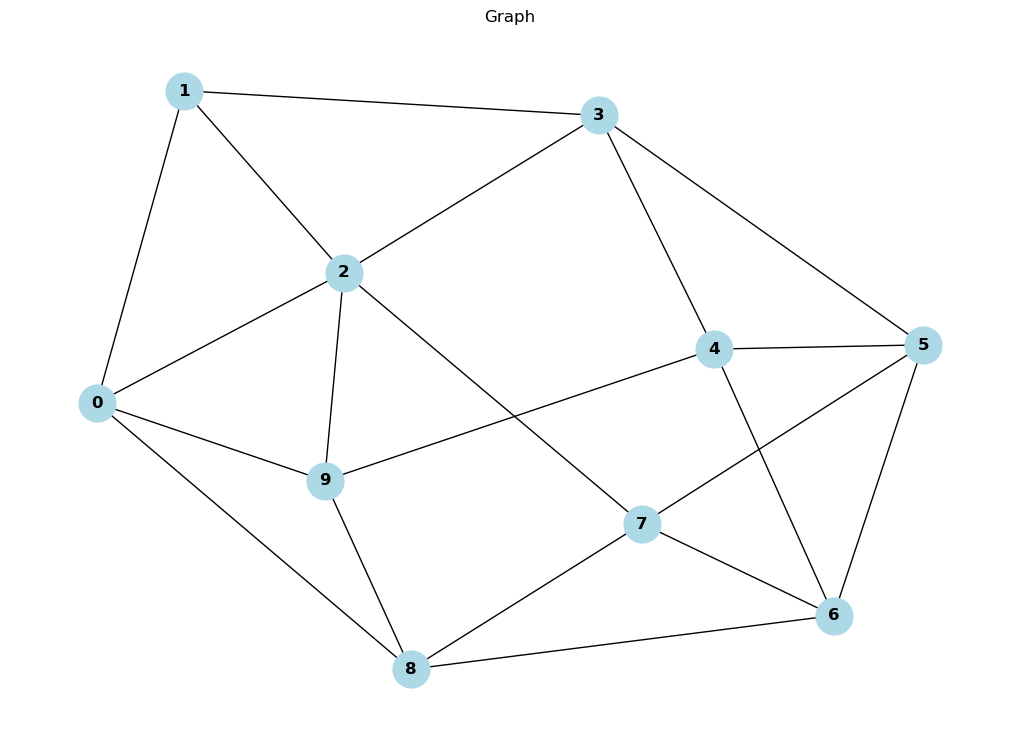

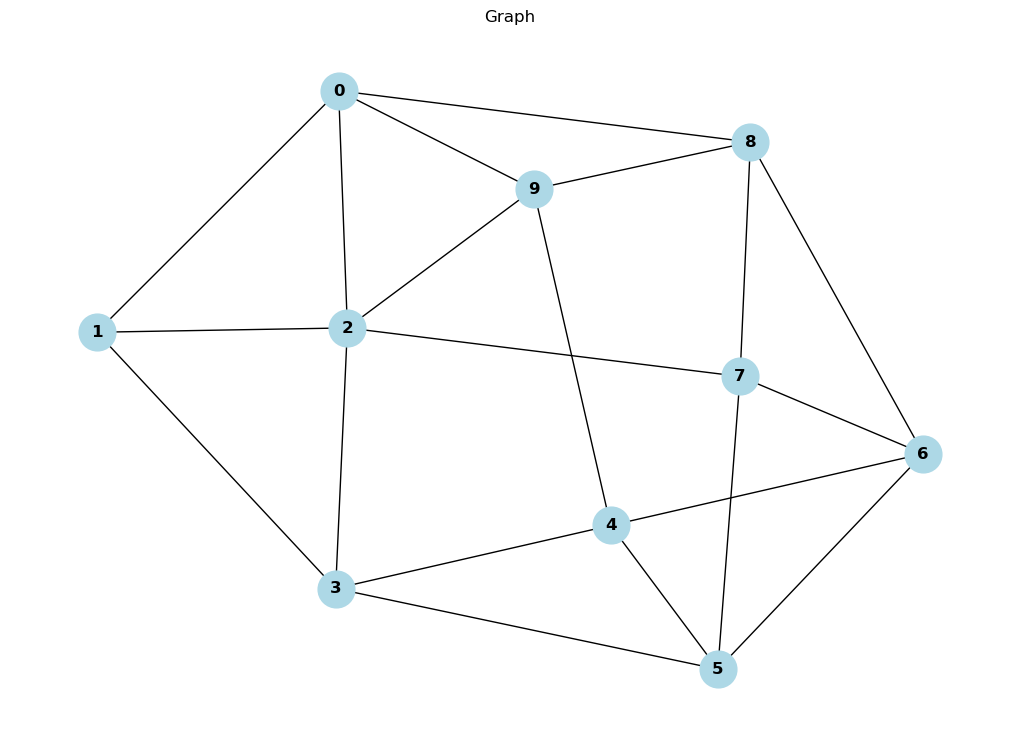

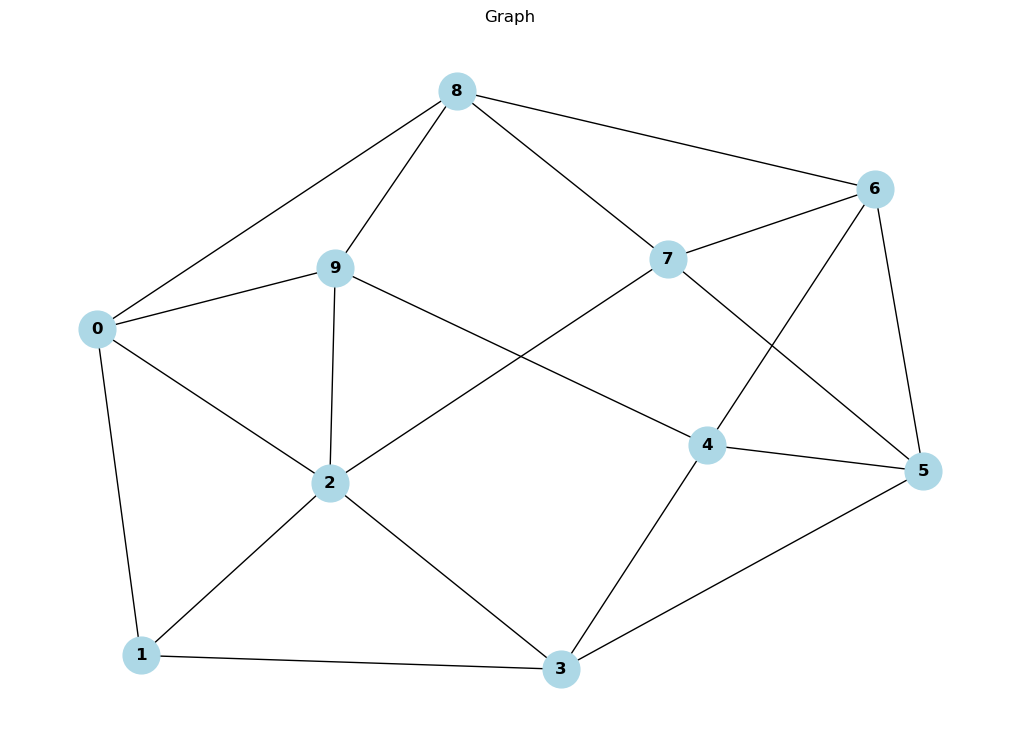

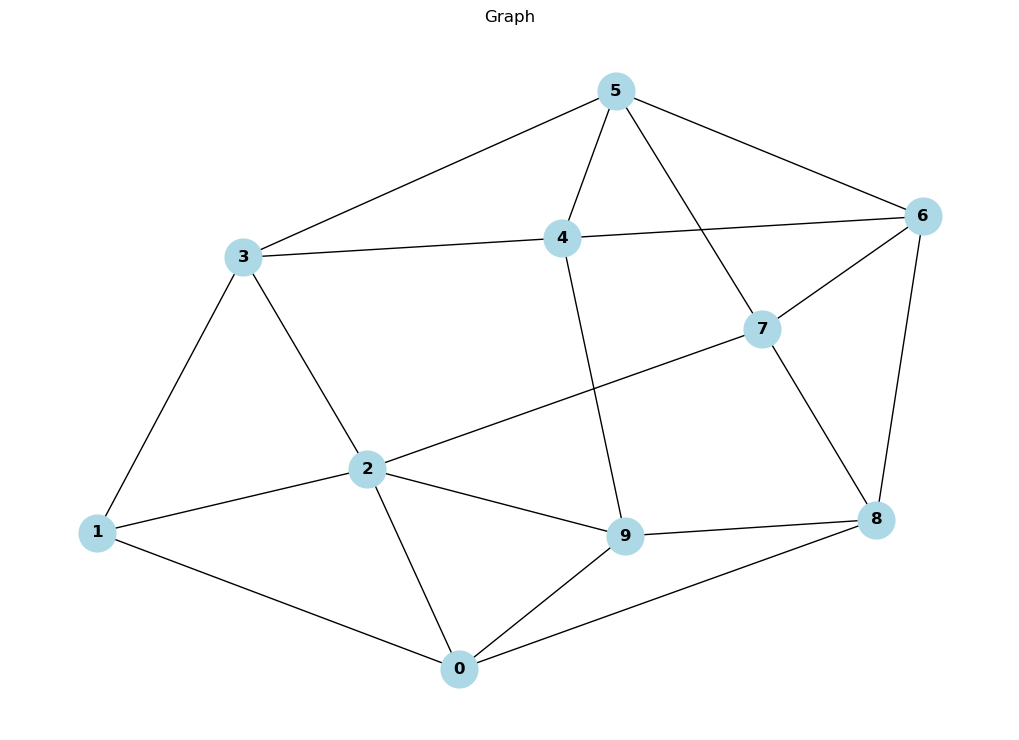

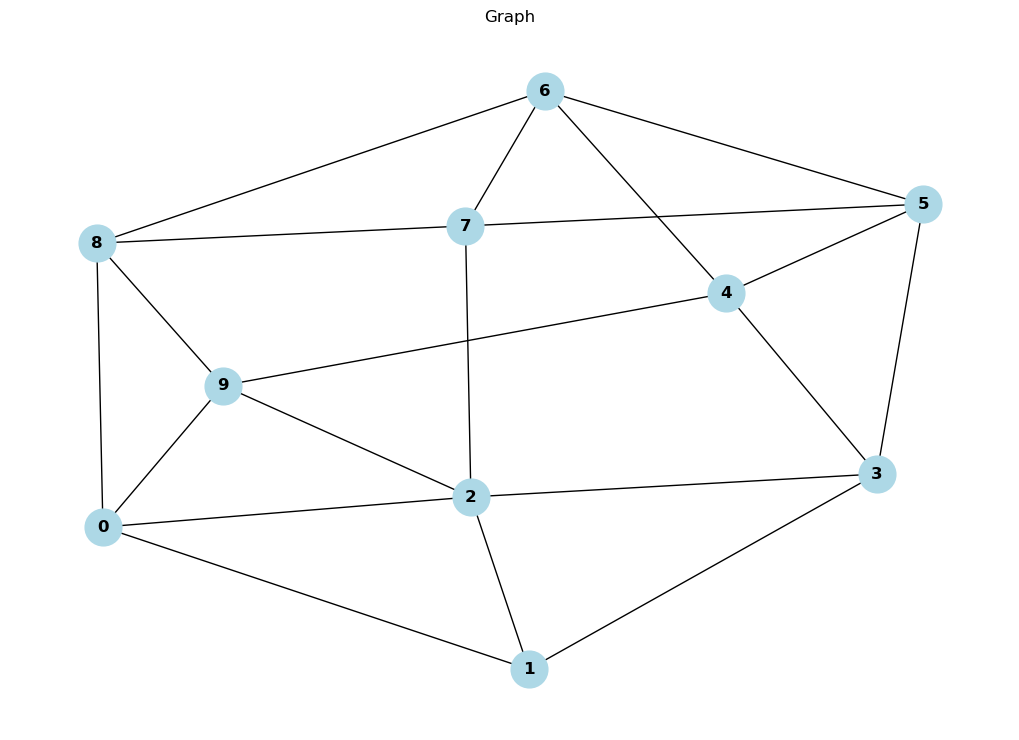

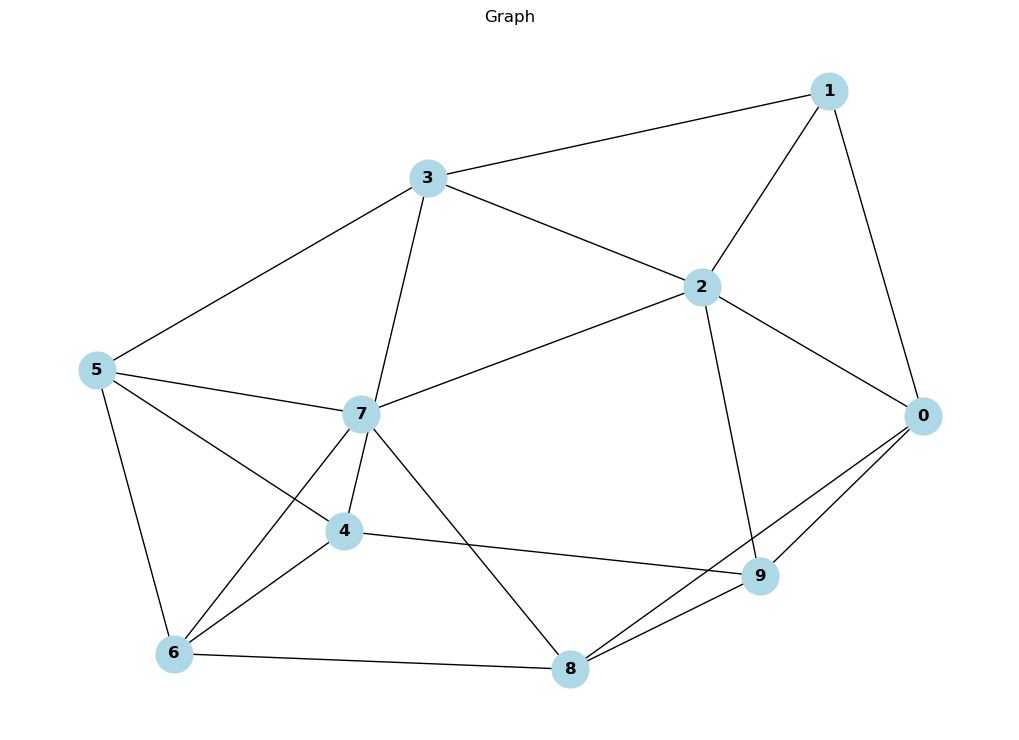

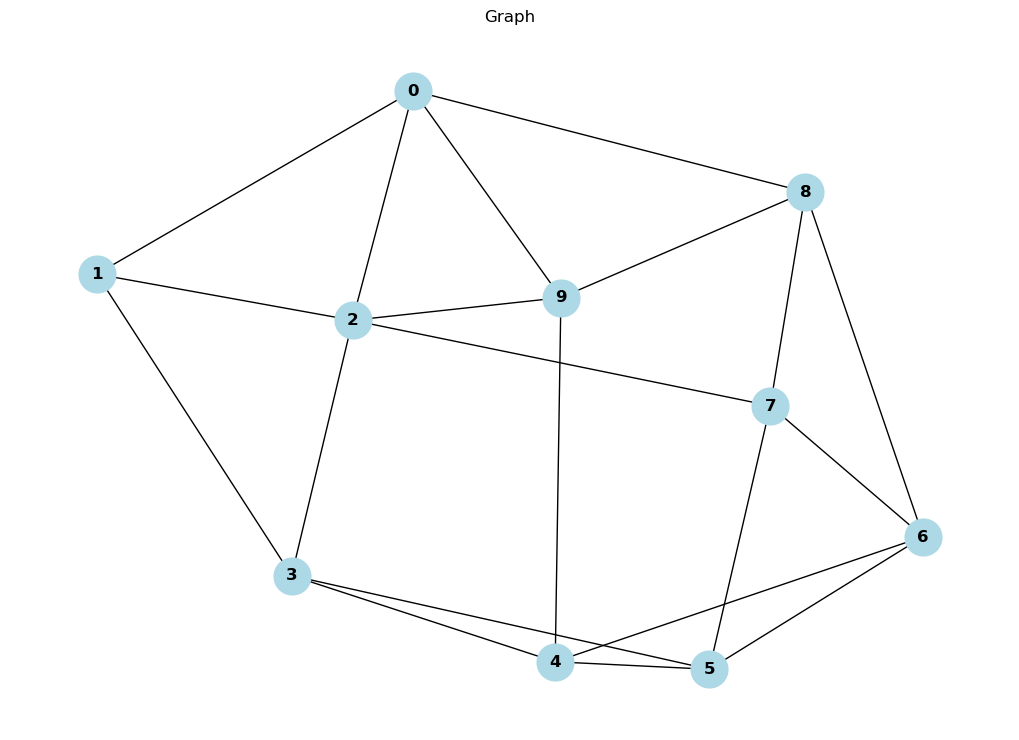

In [ ]:
graph_file_path = DATA+'/outputs/watts_strogatz/'
graphs_list = os.listdir(graph_file_path)

graphs = list()
adj_graphs = list()
degrees = list()

# Hyperparameters
hidden_size_1 = 5  # Size of the first hidden layer
hidden_size_2 = 2  # Size of the second hidden layer
rho = 0.05  # Sparsity parameter
beta = 1  # Weight for sparsity penalty
learning_rate = 0.01
num_epochs = 1000
layers_sizes = [n, hidden_size_1, hidden_size_2]  # Define the sizes of your layers

for graph in graphs_list:
    G = load_and_plot_graph(graph_file_path+graph)
    graphs.append(G)

    adjacency_matrix = nx.adjacency_matrix(G)
    adjacency_matrix = np.array(adjacency_matrix.todense())
    adj_graphs.append(adjacency_matrix)

    degree_dict = dict(G.degree())
    n = len(degree_dict)
    degree_matrix = np.zeros((n, n), dtype=int)
    np.fill_diagonal(degree_matrix, list(degree_dict.values()))
    degrees.append(degree_matrix)


In [ ]:
result = list()
for adjacency_matrix, degree_matrix in zip(adj_graphs, degrees):
    n = adjacency_matrix.shape[0]  # Number of nodes in your graph
    D = torch.from_numpy(degree_matrix).float()
    S = torch.from_numpy(adjacency_matrix).float()

    # Ensure that D is invertible
    D = D + torch.eye(n) * 1e-10

    model = model_emb(S, D, layers_sizes, rho, beta, learning_rate, num_epochs)
    hidden_activations = model()
    result.append(hidden_activations)
    #print('Result', hidden_activations)


# Spearman

In [ ]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


In [ ]:
#coef, p = spearmanr(data1, data2)